In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("projectDataset.csv")

# Display the first few rows
print(data.head())

# Check for missing values
print(data.isnull().sum())

          State          Crop  District  Year      Season    Area  Production  \
0  Chhattisgarh     Arhar/Tur  Bilaspur  2013      Kharif  2308.0        1474   
1  Chhattisgarh         Bajra  Bilaspur  2013      Kharif    14.0           7   
2  Chhattisgarh        Barley  Bilaspur  2013        Rabi     3.0           2   
3  Chhattisgarh     Coriander  Bilaspur  2013  Whole Year   243.0          66   
4  Chhattisgarh  Dry chillies  Bilaspur  2013  Whole Year   405.0         369   

   Yield       SO2        NO2       RSPM         SPM  
0   0.64  5.291667  21.473958  119.71875  389.201373  
1   0.50  5.291667  21.473958  119.71875  389.201373  
2   0.67  5.291667  21.473958  119.71875  389.201373  
3   0.27  5.291667  21.473958  119.71875  389.201373  
4   0.91  5.291667  21.473958  119.71875  389.201373  
State         0
Crop          0
District      0
Year          0
Season        0
Area          0
Production    0
Yield         0
SO2           0
NO2           0
RSPM          0
SPM    

In [3]:
# Encode categorical variables
data = pd.get_dummies(data, columns=['Crop', 'Season'], drop_first=True)

# Define independent variables (features) and dependent variable (target)
X = data[['SO2', 'NO2', 'RSPM', 'SPM', 'Area', 'Production'] + 
          [col for col in data.columns if col.startswith('Crop_') or col.startswith('Season_')]]
y = data['Yield']

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop rows with missing values
data.dropna(subset=X.columns.tolist() + ['Yield'], inplace=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Random Forest model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 34581.12716796564
R-squared: 0.9710487392640221


In [6]:
def simulate_scenario(model, scaler, data, feature, percentage_change):
    """
    Simulates a scenario by modifying a specific feature and predicting yield.
    
    Parameters:
    - model: Trained regression model.
    - scaler: Fitted scaler object.
    - data: Input dataset (Pandas DataFrame).
    - feature: Feature to modify (e.g., 'SO2').
    - percentage_change: Percentage change to apply (e.g., -10 for 10% reduction).
    
    Returns:
    - Predicted yields after applying the scenario.
    """
    # Copy the data to avoid modifying the original
    modified_data = data.copy()
    
    # Apply the percentage change to the specified feature
    modified_data[feature] = modified_data[feature] * (1 + percentage_change / 100)
    
    # Scale the modified data
    modified_data_scaled = scaler.transform(modified_data[X.columns])
    
    # Predict yields using the modified data
    predicted_yields = model.predict(modified_data_scaled)
    
    return predicted_yields

# Example: Simulate a 10% reduction in SO2
simulated_yields = simulate_scenario(model, scaler, X_test, feature='SO2', percentage_change=-10)

# Compare original vs. simulated yields
print("Original Yields:", y_test.values[:5])
print("Simulated Yields (10% SO2 Reduction):", simulated_yields[:5])

Original Yields: [ 1.    0.77  0.   14.33  0.6 ]
Simulated Yields (10% SO2 Reduction): [1.05640e+00 4.92320e+00 2.20000e-03 1.32145e+01 7.08200e-01]


In [7]:
# Calculate the difference between original and simulated yields
yield_improvement = simulated_yields - y_test.values

# Average improvement
average_improvement = yield_improvement.mean()
print(f"Average Yield Improvement: {average_improvement:.2f}")

Average Yield Improvement: 2.16


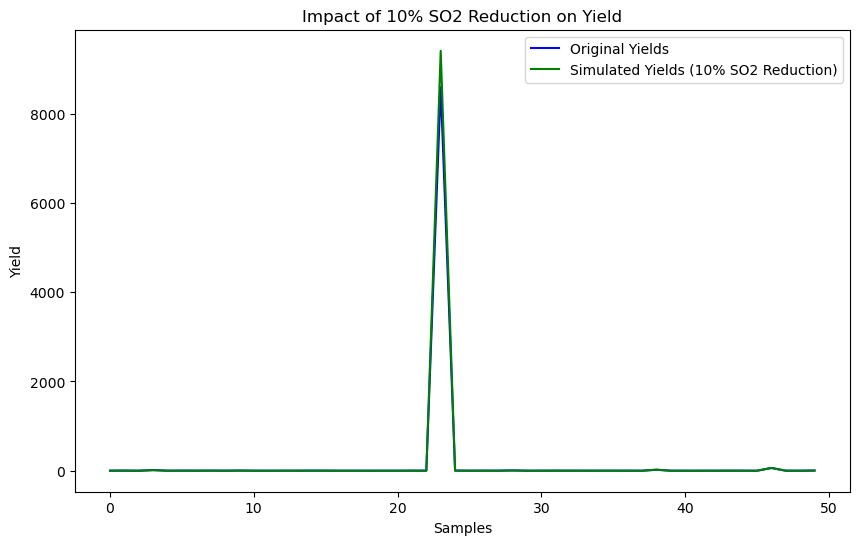

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label="Original Yields", color="blue")
plt.plot(simulated_yields[:50], label="Simulated Yields (10% SO2 Reduction)", color="green")
plt.xlabel("Samples")
plt.ylabel("Yield")
plt.title("Impact of 10% SO2 Reduction on Yield")
plt.legend()
plt.show()